In [ ]:
!unzip Kodak-20221129T034342Z-001.zip

Archive:  Kodak-20221129T034342Z-001.zip
  inflating: Kodak/kodim23.png       
  inflating: Kodak/kodim21.png       
  inflating: Kodak/kodim22.png       
  inflating: Kodak/kodim20.png       
  inflating: Kodak/kodim24.png       
  inflating: Kodak/kodim18.png       
  inflating: Kodak/kodim19.png       
  inflating: Kodak/kodim16.png       
  inflating: Kodak/kodim06.png       
  inflating: Kodak/kodim09.png       
  inflating: Kodak/kodim08.png       
  inflating: Kodak/kodim02.png       
  inflating: Kodak/kodim15.png       
  inflating: Kodak/kodim17.png       
  inflating: Kodak/kodim11.png       
  inflating: Kodak/kodim10.png       
  inflating: Kodak/kodim14.png       
  inflating: Kodak/kodim13.png       
  inflating: Kodak/kodim12.png       
  inflating: Kodak/kodim04.png       
  inflating: Kodak/kodim03.png       
  inflating: Kodak/kodim05.png       
  inflating: Kodak/kodim07.png       
  inflating: Kodak/kodim01.png       


In [ ]:
!unzip /content/Dataset4K-20221130T231802Z-001.zip

Archive:  /content/Dataset4K-20221130T231802Z-001.zip
replace Dataset4K/4k-3840-x-2160-wallpapers-themefoxx (82).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Dataset4K/4k-3840-x-2160-wallpapers-themefoxx (84).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace Dataset4K/4k-3840-x-2160-wallpapers-themefoxx (84).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [11]:

import numpy as np 
import pandas as pd 
import cv2
import scipy
import math
import os, random
from skimage.metrics import structural_similarity
from PIL import Image
from numpy import r_
from scipy import fftpack
from matplotlib import pyplot as plt
from matplotlib.image import imread
%matplotlib inline

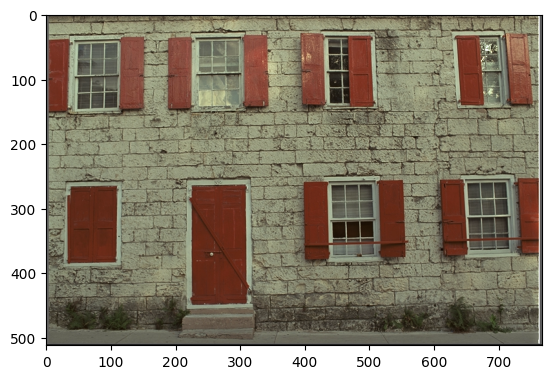

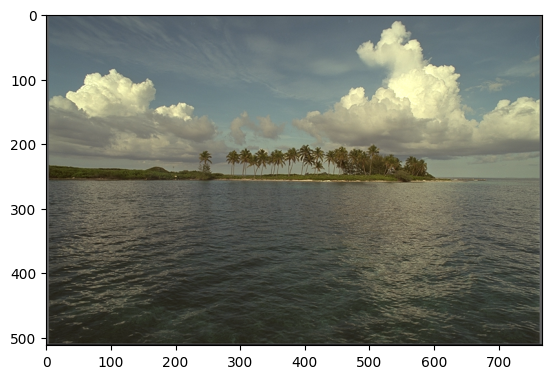

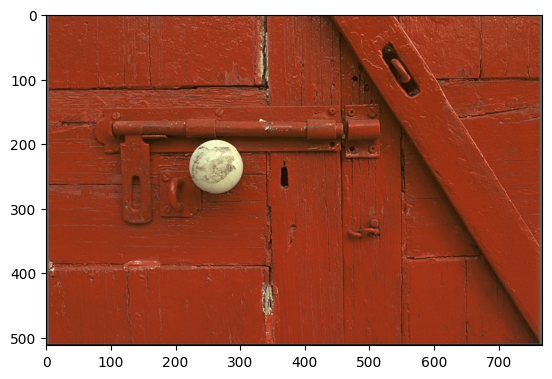

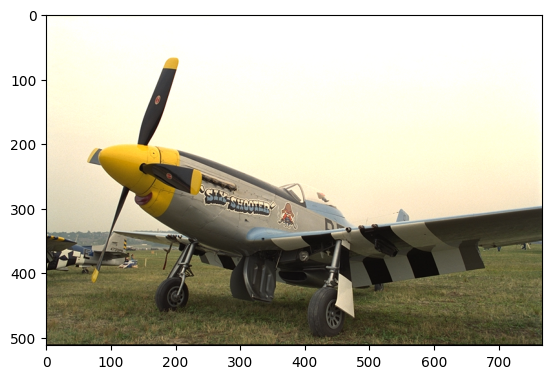

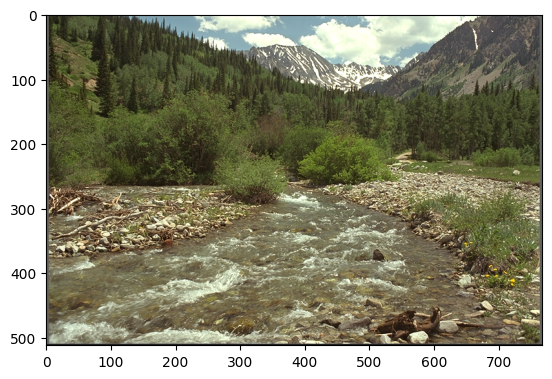

In [18]:
for i in range(5):
  imgPath = os.path.join('Kodak/', np.random.choice((os.listdir("Kodak"))))
  img = Image.open(imgPath)
  f = plt.figure()
  plt.imshow(img)

original image: (2160, 3840, 3)
grayscaled image: (2160, 3840)


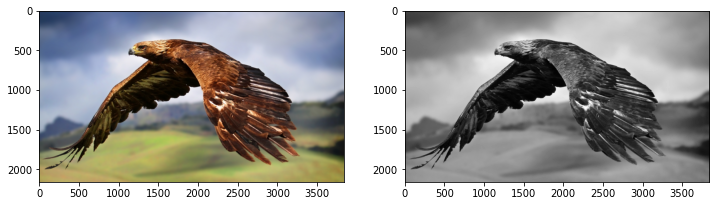

In [ ]:
img_path = "/content/Dataset4K/4k-3840-x-2160-wallpapers-themefoxx (1).jpg"
# img = imread(img_path)
im = Image.open(img_path)
im.save('img.png')
img = imread('img.png')
img_gray = np.mean(img, -1)

n_rows, n_cols = img_gray.shape

print(f'original image: {img.shape}')
print(f'grayscaled image: {img_gray.shape}')

fig = plt.figure(0, (12,6))
for idx, im in enumerate([img, img_gray]):
    ax = plt.subplot(1,2, idx+1)

    if len(im.shape)==2:
        ax.imshow(im, cmap='gray')
    else:
        ax.imshow(im)

#SVD Code

In [22]:
def svd(img, full_matrices=False):
    U, S, VT = np.linalg.svd(img, full_matrices=full_matrices)
    return (U, np.diag(S), VT)


# Evaluation Code


In [23]:
def psnr(original, compressed):
    mse = np.mean( (original - compressed) ** 2 )
    if mse == 0:
        return 100 
    PIXEL_MAX = 255.0
    return round((20 * math.log10(PIXEL_MAX / math.sqrt(mse))), 3)

def ssim(original, compressed):
    meanSSIM = structural_similarity(original, compressed, multichannel=True)
    return round(meanSSIM, 3) 

# def perc_storage(rank, n_rows, n_cols):
#     'calculate compresssion ratio in SVD'
#     original_space = n_rows*n_cols
#     compressed_space = n_rows*rank + rank + n_cols*rank
#     return round(compressed_space / original_space * 100,2)
    
# def cr2(original, compressed):
#     nonZerosInOriginal = np.sum(original!=0)
#     nonZerosInCompressed = np.sum(compressed!=0)
#     return round(nonZerosInOriginal/nonZerosInCompressed, 3)
    
def cr(original_img, compressed_img):
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    compressed_img = cv2.cvtColor(compressed_img, cv2.COLOR_BGR2RGB)

    original_img=cv2.imwrite("original.png", original_img)
    # print("Original File Size: "+str(os.path.getsize("original.png")))
    
    compressed_img=cv2.imwrite("compressed.png", compressed_img)
    # print("Compressed File Size: "+str(os.path.getsize("compressed.png")))

    return round(os.path.getsize("original.png")/os.path.getsize("compressed.png"), 3)
    
# def metrics( original_img, compressed_img ):
#     print("Achieved Peak Signal to Noise Ratio: " + str(psnr(original_img, compressed_img)))
#     print("Achieved SSIM : " + str(ssim(original_img, compressed_img)))
#     print("Achieved Compression Ratio: " + str(cr(original_img, compressed_img)))  
#     print("CR 2 = ", cr2(original_img, compressed_img))
#     return cr(original_img, compressed_img), psnr(original_img, compressed_img), ssim(original_img, compressed_img)

# Grayscale Compression

## Illustration using ranks 5, 25, 50, 100, 250

In [24]:
U, S, VT = svd(img_gray)

RANKS = [5, 25, 50, 100, 250]

fig = plt.figure(0, (18, 12))
fig.subplots_adjust(top=1.1)

for idx, r in enumerate(RANKS):
    X_r = U[:, :r] @ S[:r, :r] @ VT[:r, :]

    ax = plt.subplot(2,3, idx+1)
    ax.imshow(X_r, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_title(f'''rank {r}\nCompression Ratio: {cr(img_gray, X_r)}
    PSNR: {round(psnr(img_gray, X_r), 2)}
    SSIM: {round(ssim(img_gray, X_r), 2)}
    ''')
    
ax = plt.subplot(2, 3, idx+2)
ax.imshow(img_gray, cmap='gray')
ax.set_title('original image')
ax.set_xticks([])
ax.set_yticks([])


NameError: name 'img_gray' is not defined

## Compare performance using different ranks

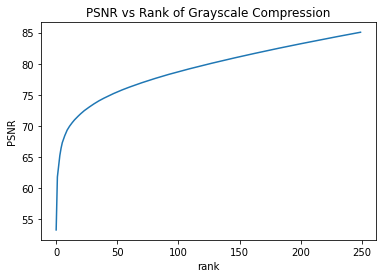

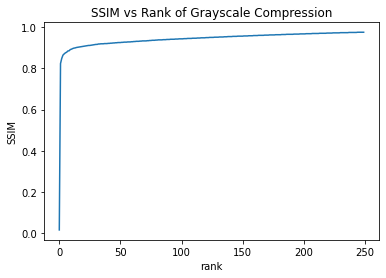

In [ ]:
U, S, VT = svd(img_gray)

rank_list = [n for n in range(250)]
X_list = []
psnr_list = []
ssim_list = []
for r in rank_list:
  X_r = U[:, :r] @ S[:r, :r] @ VT[:r, :]
  p = psnr(img_gray, X_r)
  s = ssim(img_gray, X_r)

  X_list.append(X_r)
  psnr_list.append(p)
  ssim_list.append(s)



# plot PSNR vs rank
fig, ax = plt.subplots()
ax.plot(rank_list, psnr_list)
ax.set(xlabel='rank', ylabel='PSNR',
       title='PSNR vs Rank of Grayscale Compression')
plt.savefig('psnr-gray.png')
plt.show()


#plot SSIM vs rank
fig, ax = plt.subplots()
ax.plot(rank_list, ssim_list)
ax.set(xlabel='rank', ylabel='SSIM',
       title='SSIM vs Rank of Grayscale Compression')
plt.savefig('ssim-gray.png')
plt.show()



# Color Compression

## Illustration using ranks 5, 25, 50, 100, 250

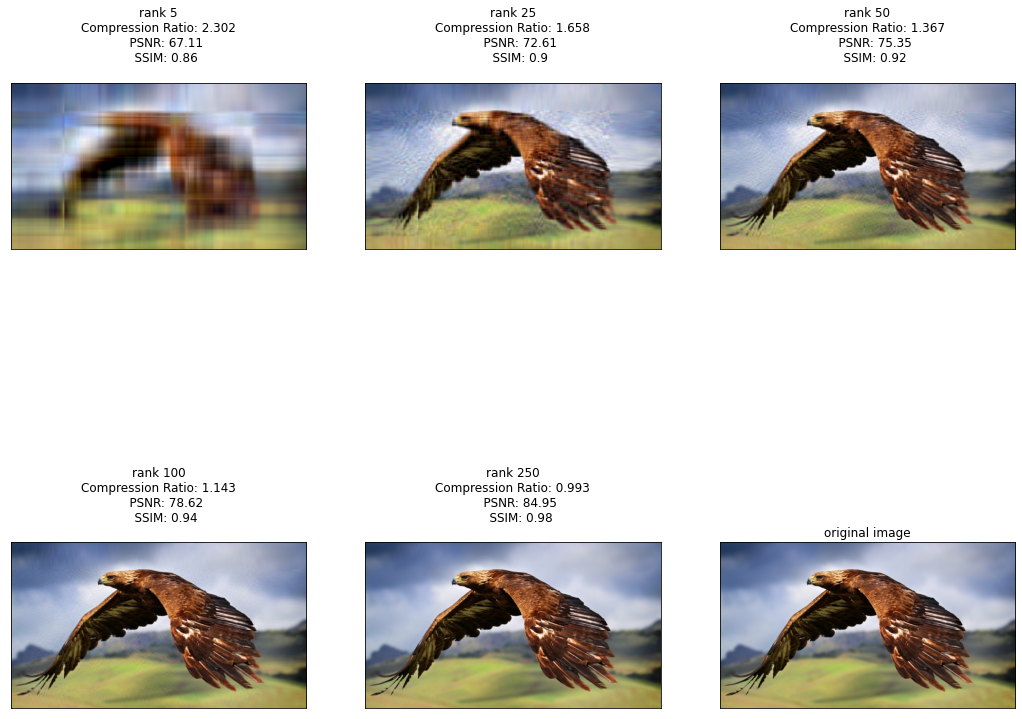

In [ ]:
RANKS = [5, 25, 50, 100, 250]

red_channel, green_channel, blue_channel =  img[:, :, 0], img[:, :, 1], img[:, :, 2]

U_B, S_B, VT_B = svd(blue_channel)
U_G, S_G, VT_G = svd(green_channel)
U_R, S_R, VT_R = svd(red_channel)
    
fig = plt.figure(0, (18, 12))
fig.subplots_adjust(top=1.1)

for idx, r in enumerate(RANKS):
    XR_r = U_R[:, :r] @ S_R[:r, :r] @ VT_R[:r, :]
    XG_r = U_G[:, :r] @ S_G[:r, :r] @ VT_G[:r, :]
    XB_r = U_B[:, :r] @ S_B[:r, :r] @ VT_B[:r, :]

    X_r = np.dstack((XR_r, XG_r, XB_r))
    

    ax = plt.subplot(2,3, idx+1)
    ax.imshow(X_r)
    ax.set_xticks([])
    ax.set_yticks([])
        
    ax.set_title(f'''rank {r}\nCompression Ratio: {cr(img, X_r)}
    PSNR: {round(psnr(img, X_r), 2)}
    SSIM: {round(ssim(img, X_r), 2)}
    ''')
    
ax = plt.subplot(2, 3, idx+2)
ax.imshow(img)
ax.set_title('original image')
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('color-stack.png')

## Compare performance using different ranks

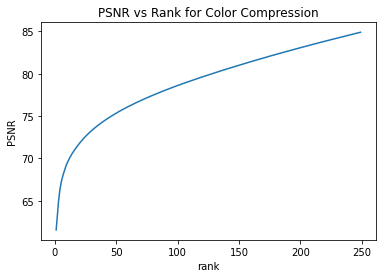

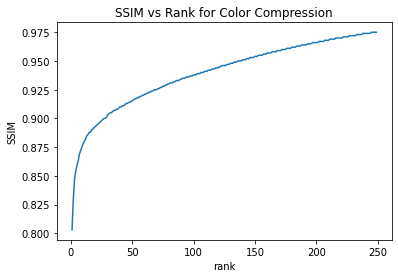

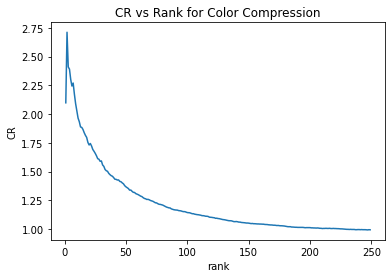

In [ ]:
rank_list = [n for n in range(1, 250)]
psnr_list = []
ssim_list = []
cr_list = []

red_channel, green_channel, blue_channel =  img[:, :, 0], img[:, :, 1], img[:, :, 2]

U_B, S_B, VT_B = svd(blue_channel)
U_G, S_G, VT_G = svd(green_channel)
U_R, S_R, VT_R = svd(red_channel)

for r in (rank_list):
    XR_r = U_R[:, :r] @ S_R[:r, :r] @ VT_R[:r, :]
    XG_r = U_G[:, :r] @ S_G[:r, :r] @ VT_G[:r, :]
    XB_r = U_B[:, :r] @ S_B[:r, :r] @ VT_B[:r, :]

    X_r = np.dstack((XR_r, XG_r, XB_r))

    p = psnr(img, X_r)
    s = ssim(img, X_r)
    c = cr(img, X_r)

    psnr_list.append(p)
    ssim_list.append(s)
    cr_list.append(c)



# plot PSNR vs rank
fig, ax = plt.subplots()
ax.plot(rank_list, psnr_list)
ax.set(xlabel='rank', ylabel='PSNR',
       title='PSNR vs Rank for Color Compression')
plt.savefig('psnr-color.png')
plt.show()


#plot SSIM vs rank
fig, ax = plt.subplots()
ax.plot(rank_list, ssim_list)
ax.set(xlabel='rank', ylabel='SSIM',
       title='SSIM vs Rank for Color Compression')
plt.savefig('ssim-color.png')
plt.show()


#plot CR vs rank
fig, ax = plt.subplots()
ax.plot(rank_list, cr_list)
ax.set(xlabel='rank', ylabel='CR',
       title='CR vs Rank for Color Compression')
plt.savefig('cr-color.png')
plt.show()

In [ ]:
print(cr_list)

# Evaluate on whole dataset

In [ ]:
from skimage.util import img_as_bool
import time
folderName = 'Kodak'
# folderName = 'Dataset4K'
CR_LIST = []
PSNR_LIST = []
SSIM_LIST = []
start_time = time.time()

# RANKS = [n for n in range(250)]
RANKS = [10, 50, 100, 200, 250]
r = RANKS

for r in RANKS:
    for fileName in (os.listdir(folderName)):
        imagePath = os.path.join(folderName, fileName)
        img = imread(imagePath)

        # X_compressed = np.asarray(DCT_compression(image, thresh, 100, 100), dtype=None, order=None )
        # X_reconstructed = np.asarray(reverse_compression(X_compressed, 100, 100))


        
        psnr_list = []
        ssim_list = []

        red_channel, green_channel, blue_channel =  img[:, :, 0], img[:, :, 1], img[:, :, 2]

        U_B, S_B, VT_B = svd(blue_channel)
        U_G, S_G, VT_G = svd(green_channel)
        U_R, S_R, VT_R = svd(red_channel)

        
        XR_r = U_R[:, :r] @ S_R[:r, :r] @ VT_R[:r, :]
        XG_r = U_G[:, :r] @ S_G[:r, :r] @ VT_G[:r, :]
        XB_r = U_B[:, :r] @ S_B[:r, :r] @ VT_B[:r, :]

        X_r = np.dstack((XR_r, XG_r, XB_r))

        p = psnr(img, X_r)
        s = ssim(img, X_r)
        c = cr(img, X_r)

            
        end_time = time.time()
        CR_LIST.append(c)
        PSNR_LIST.append(p)
        SSIM_LIST.append(s)
    
    print("RANKS = ", r)
    print("MEAN CR = ", sum(CR_LIST)/len(CR_LIST))
    print("MEAN PSNR = ", sum(PSNR_LIST)/len(PSNR_LIST))
    print("MEAN SSIM = ", sum(SSIM_LIST)/len(SSIM_LIST))
    print("TOTAL RUNNING TIME = ", end_time - start_time)

RANKS =  10
MEAN CR =  1.8915
MEAN PSNR =  70.99958333333333
MEAN SSIM =  0.7286250000000001
TOTAL RUNNING TIME =  17.07877802848816
RANKS =  50
MEAN CR =  1.5786249999999997
MEAN PSNR =  73.56370833333334
MEAN SSIM =  0.7911041666666665
TOTAL RUNNING TIME =  33.56056571006775
RANKS =  100
MEAN CR =  1.4212499999999992
MEAN PSNR =  75.6073611111111
MEAN SSIM =  0.83375
TOTAL RUNNING TIME =  50.70441484451294
RANKS =  200
MEAN CR =  1.3218124999999994
MEAN PSNR =  78.15596874999996
MEAN SSIM =  0.8687187500000002
TOTAL RUNNING TIME =  67.46364092826843
RANKS =  250
MEAN CR =  1.2601249999999993
MEAN PSNR =  80.30440833333328
MEAN SSIM =  0.8921166666666667
TOTAL RUNNING TIME =  84.85526585578918


# 4K

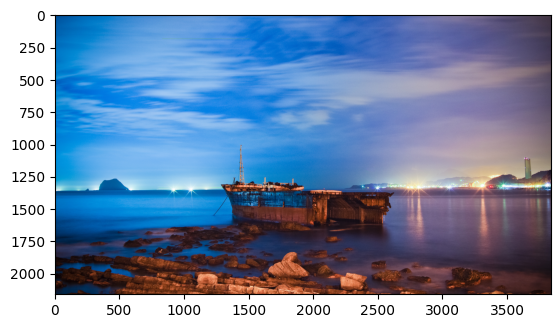

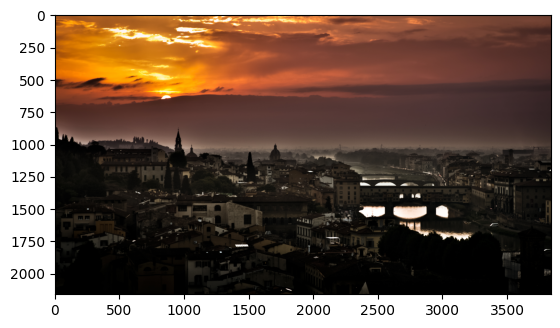

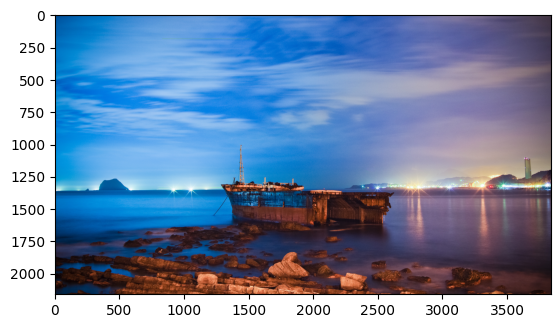

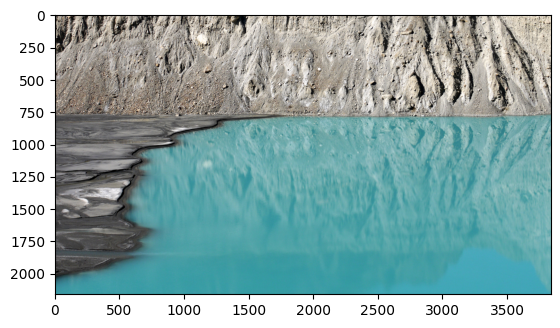

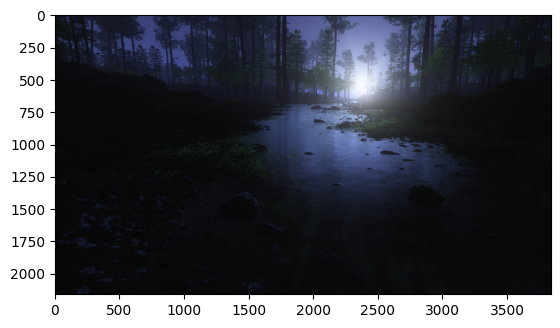

In [25]:
for i in range(5):
  imgPath = os.path.join('Dataset4K', np.random.choice((os.listdir("Dataset4K"))))
  img = Image.open(imgPath)
  f = plt.figure()
  plt.imshow(img)

In [ ]:
import time
# folderName = 'Kodak'
folderName = 'Dataset4K'
CR_LIST = []
PSNR_LIST = []
SSIM_LIST = []
start_time = time.time()

# RANKS = [n for n in range(250)]
RANKS = [10, 50, 100, 200, 250]
r = 50

for r in RANKS:
    for fileName in (os.listdir(folderName)):
        imagePath = os.path.join(folderName, fileName)
        img = imread(imagePath)
        img = np.float32(img)

        # X_compressed = np.asarray(DCT_compression(image, thresh, 100, 100), dtype=None, order=None )
        # X_reconstructed = np.asarray(reverse_compression(X_compressed, 100, 100))


        
        psnr_list = []
        ssim_list = []

        red_channel, green_channel, blue_channel =  img[:, :, 0], img[:, :, 1], img[:, :, 2]

        U_B, S_B, VT_B = svd(blue_channel)
        U_G, S_G, VT_G = svd(green_channel)
        U_R, S_R, VT_R = svd(red_channel)

        
        XR_r = U_R[:, :r] @ S_R[:r, :r] @ VT_R[:r, :]
        XG_r = U_G[:, :r] @ S_G[:r, :r] @ VT_G[:r, :]
        XB_r = U_B[:, :r] @ S_B[:r, :r] @ VT_B[:r, :]

        X_r = np.dstack((XR_r, XG_r, XB_r))

        p = psnr(img, X_r)
        s = ssim(img, X_r)
        c = cr(img, X_r)

            
        end_time = time.time()
        CR_LIST.append(c)
        PSNR_LIST.append(p)
        SSIM_LIST.append(s)
        print('IMAGE = ', fileName)
        print("RANKS = ", r)
        print("MEAN CR = ", sum(CR_LIST)/len(CR_LIST))
        print("MEAN PSNR = ", sum(PSNR_LIST)/len(PSNR_LIST))
        print("MEAN SSIM = ", sum(SSIM_LIST)/len(SSIM_LIST))
        print("TOTAL RUNNING TIME = ", end_time - start_time)
    
    print("RANKS = ", r)
    print("MEAN CR = ", sum(CR_LIST)/len(CR_LIST))
    print("MEAN PSNR = ", sum(PSNR_LIST)/len(PSNR_LIST))
    print("MEAN SSIM = ", sum(SSIM_LIST)/len(SSIM_LIST))
    print("TOTAL RUNNING TIME = ", end_time - start_time)

/var/folders/4n/tsr8f9vn6yg9dh9zwqcbzdp80000gn/T/ipykernel_41299/167496060.py:9: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  meanSSIM = structural_similarity(original, compressed, multichannel=True)


IMAGE =  4k-3840-x-2160-wallpapers-themefoxx (3).jpg
RANKS =  10
MEAN CR =  2.284
MEAN PSNR =  23.186
MEAN SSIM =  0.020999999716877937
TOTAL RUNNING TIME =  21.855154037475586
IMAGE =  4k-3840-x-2160-wallpapers-themefoxx (59).jpg
RANKS =  10
MEAN CR =  1.976
MEAN PSNR =  20.633499999999998
MEAN SSIM =  0.04450000170618296
TOTAL RUNNING TIME =  45.799641132354736
IMAGE =  4k-3840-x-2160-wallpapers-themefoxx (18).jpg
RANKS =  10
MEAN CR =  1.9356666666666669
MEAN PSNR =  22.705333333333332
MEAN SSIM =  0.05100000215073427
TOTAL RUNNING TIME =  81.38989496231079
IMAGE =  4k-3840-x-2160-wallpapers-themefoxx (34).jpg
RANKS =  10
MEAN CR =  2.02025
MEAN PSNR =  24.785249999999998
MEAN SSIM =  0.06350000249221921
TOTAL RUNNING TIME =  103.15759897232056
